In [1]:
conda install -c conda-forge py-xgboost

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('to_pickle.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,Churn,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,No internet service,back_no
0,0.0,0.0,1,0.0,1.0,1.0,1.0,0.115423,0.0,0.0
1,0.0,0.0,6,0.0,0.0,0.0,0.0,0.385075,0.0,1.0
2,1.0,0.0,1,0.0,1.0,1.0,0.0,0.354229,0.0,0.0
3,0.0,0.0,8,0.0,0.0,0.0,0.0,0.239303,0.0,1.0
4,1.0,0.0,1,0.0,1.0,1.0,1.0,0.521891,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,4,1.0,0.0,1.0,0.0,0.662189,0.0,1.0
7039,0.0,1.0,12,1.0,0.0,1.0,0.0,0.845274,0.0,0.0
7040,0.0,1.0,2,0.0,1.0,1.0,1.0,0.112935,0.0,1.0
7041,1.0,0.0,1,1.0,1.0,1.0,0.0,0.558706,0.0,1.0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Churn'], axis=1), df['Churn'], test_size=0.3, shuffle=True)
x_train

,Dependents,tenure,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,No internet service,back_no
5693,0.0,12,1.0,0.0,1.0,0.0,0.549254,0.0,1.0
6074,0.0,1,0.0,1.0,1.0,1.0,0.051741,0.0,1.0
3931,0.0,5,0.0,1.0,1.0,0.0,0.525373,0.0,0.0
5299,0.0,5,1.0,1.0,1.0,0.0,0.826368,0.0,1.0
2287,0.0,12,1.0,0.0,1.0,0.0,0.897015,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2554,0.0,3,0.0,1.0,1.0,0.0,0.315920,0.0,1.0
4436,1.0,4,0.0,1.0,1.0,1.0,0.421393,0.0,0.0
5841,0.0,12,0.0,0.0,1.0,1.0,0.268657,0.0,1.0
913,0.0,2,0.0,0.0,0.0,0.0,0.017910,1.0,0.0


# 1. Decesion Tree

In [6]:
dct1 = DecisionTreeClassifier()
param = {'max_depth':[4, 5, 6 ,8, 10], 'ccp_alpha':[0, 0.01, 0.1, 0.5, 1, 10]}

gs1 = GridSearchCV(estimator=dct1, param_grid=param, cv=8, scoring='accuracy', return_train_score=True)

gs1.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.01, 0.1, 0.5, 1, 10],
                         'max_depth': [4, 5, 6, 8, 10]},
             return_train_score=True, scoring='accuracy')

In [7]:
print(gs1.best_params_)
print(gs1.best_score_)
print(gs1.best_estimator_)

{'ccp_alpha': 0, 'max_depth': 5}
0.7813411011597803
DecisionTreeClassifier(ccp_alpha=0, max_depth=5)


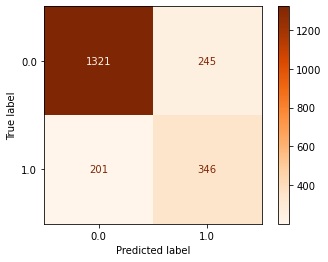

In [8]:
plt1 = plot_confusion_matrix(gs1, x_test, y_test, cmap='Oranges')
plt1

In [9]:
dct2 = DecisionTreeClassifier()
param = {'max_depth':[4, 5, 6 ,8, 10], 'ccp_alpha':[0, 0.01, 0.1, 0.5, 1, 10]}

gs2 = GridSearchCV(estimator=dct2, param_grid=param, cv=8, scoring='neg_log_loss', return_train_score=True)

gs2.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.01, 0.1, 0.5, 1, 10],
                         'max_depth': [4, 5, 6, 8, 10]},
             return_train_score=True, scoring='neg_log_loss')

In [10]:
print(gs2.best_params_)
print(gs2.best_score_)
print(gs2.best_estimator_)

{'ccp_alpha': 0, 'max_depth': 4}
-0.4547179502302965
DecisionTreeClassifier(ccp_alpha=0, max_depth=4)


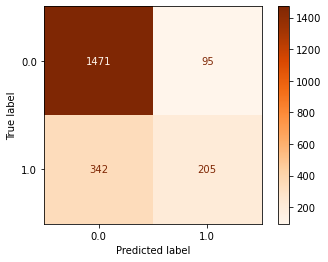

In [11]:
plt2 = plot_confusion_matrix(gs2, x_test, y_test, cmap='Oranges')
plt2

# 2. Ensembles

## 2.1 Bagging

In [12]:
rf = RandomForestClassifier(max_depth=4)
rf.fit(x_train, y_train)
accuracy_score(y_test, rf.predict(x_test))

0.8050165641268339

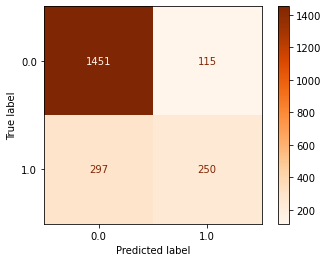

In [13]:
plt3 = plot_confusion_matrix(rf, x_test, y_test, cmap='Oranges')
plt3

## 2.2 AdaBoost

In [14]:
abc1 = AdaBoostClassifier()
abc1.fit(x_train, y_train)
accuracy_score(y_test, abc1.predict(x_test))

0.7983909133932797

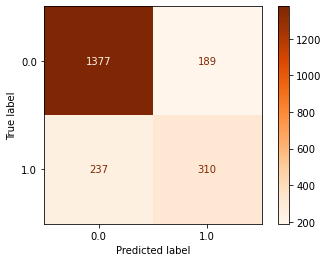

In [15]:
plt = plot_confusion_matrix(abc1, x_test, y_test, cmap='Oranges')
plt

In [16]:
rf_a = RandomForestClassifier(max_depth=2)
abc2 = AdaBoostClassifier(base_estimator=rf_a)
abc2.fit(x_train, y_train)
abc2.predict(x_test)

array([0., 0., 1., ..., 0., 1., 1.])

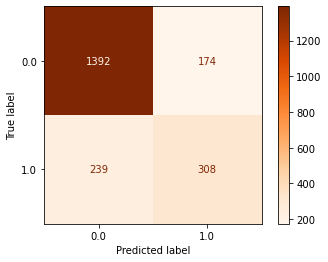

In [17]:
plt = plot_confusion_matrix(abc2, x_test, y_test, cmap='Oranges')
plt

## 2.3 XGBoost

In [18]:
xgb = XGBClassifier(n_estimators=50, learning_rate=0.2, max_depth=3)
xgb.fit(x_train, y_train)
accuracy_score(y_test, xgb.predict(x_test))

[16:54:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.807382867960246

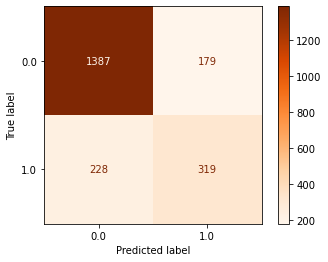

In [19]:
plt = plot_confusion_matrix(xgb, x_test, y_test, cmap='Oranges')
plt

## 2.4 Stacking

In [20]:
lr = LogisticRegression()
svc=SVC(kernel='rbf', C = 100)
dct = DecisionTreeClassifier(max_depth=4)

est = [('lr',lr), ('svc', svc), ('dct', dct)]

sc = StackingClassifier(estimators=est, cv=5)
sc.fit(x_train, y_train)
accuracy_score(y_test, sc.predict(x_test))

0.8102224325603408

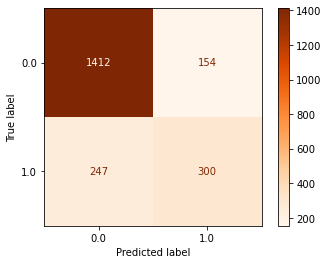

In [21]:
plt = plot_confusion_matrix(sc, x_test, y_test, cmap='Oranges')
plt